In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)

In [43]:
#read the data from the csv file 
df = pd.read_csv('D:\Downloads\movies.csv')

In [3]:
#Quick look at the data
df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [5]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
#get rid of all null values
df = df.dropna()

In [7]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [8]:
#show all rows of data instead of summarizing the dataset by showing the first and last 5 rows
pd.set_option('display.max_rows',None)

In [16]:
#checking if theres duplicate rows
df.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
17      False
18      False
20      False
21      False
22      False
23      False
28      False
29      False
33      False
35      False
36      False
37      False
42      False
46      False
48      False
50      False
51      False
53      False
56      False
57      False
58      False
75      False
77      False
80      False
92      False
94      False
95      False
96      False
97      False
98      False
99      False
100     False
101     False
103     False
105     False
106     False
108     False
110     False
112     False
113     False
114     False
115     False
117     False
118     False
119     False
120     False
121     False
122     False
126     False
127     False
128     False
129     False
130     False
131     False
132     False
133   

In [10]:
#create correct year column
df['years_correct'] = df['released'].str.extract(pat = '([0-9]{4})').astype('int')

In [44]:
#sorting the dataset by movie gross income
df.sort_values(by=['gross'], inplace = True, ascending = False)

In [19]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,years_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


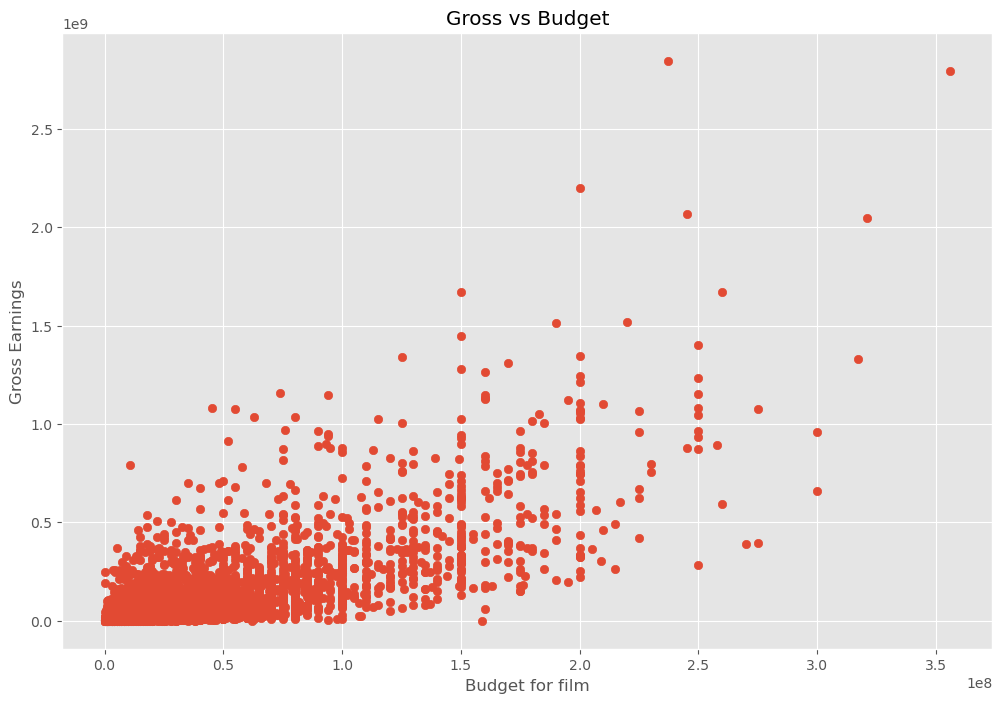

In [22]:
plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Gross vs Budget')
plt.xlabel('Budget for film') 
plt.ylabel('Gross Earnings')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

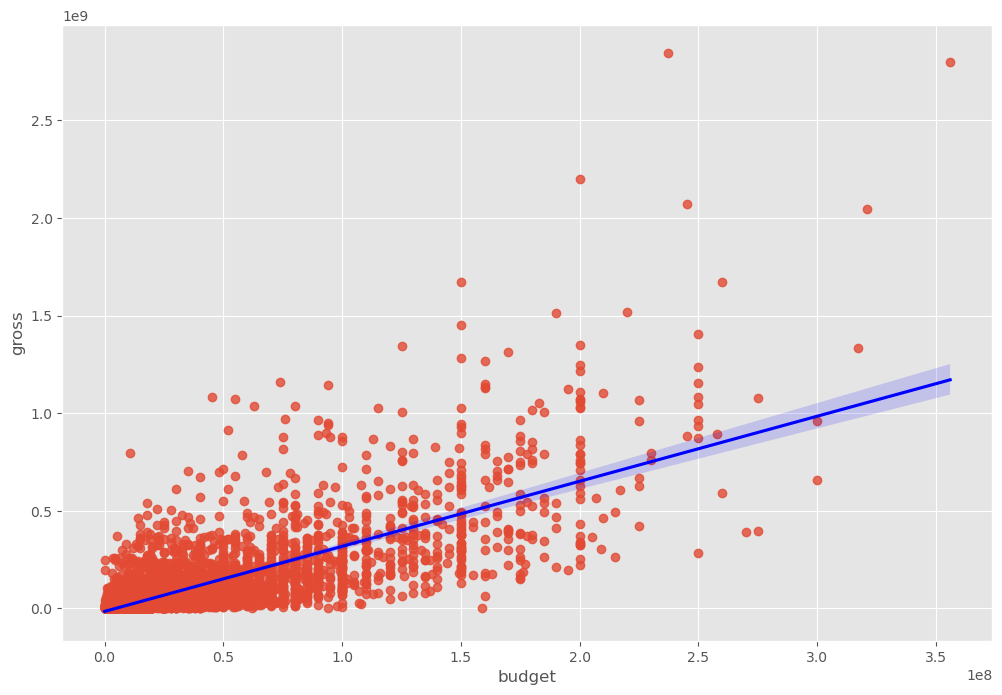

In [25]:
sns.regplot(x='budget', y='gross', data=df,line_kws={'color' : 'blue'})

In [26]:
#lets try to look at correlation
df.corr()

,year,score,votes,budget,gross,runtime,years_correct
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
years_correct,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


Text(120.72222222222221, 0.5, 'Movie Features')

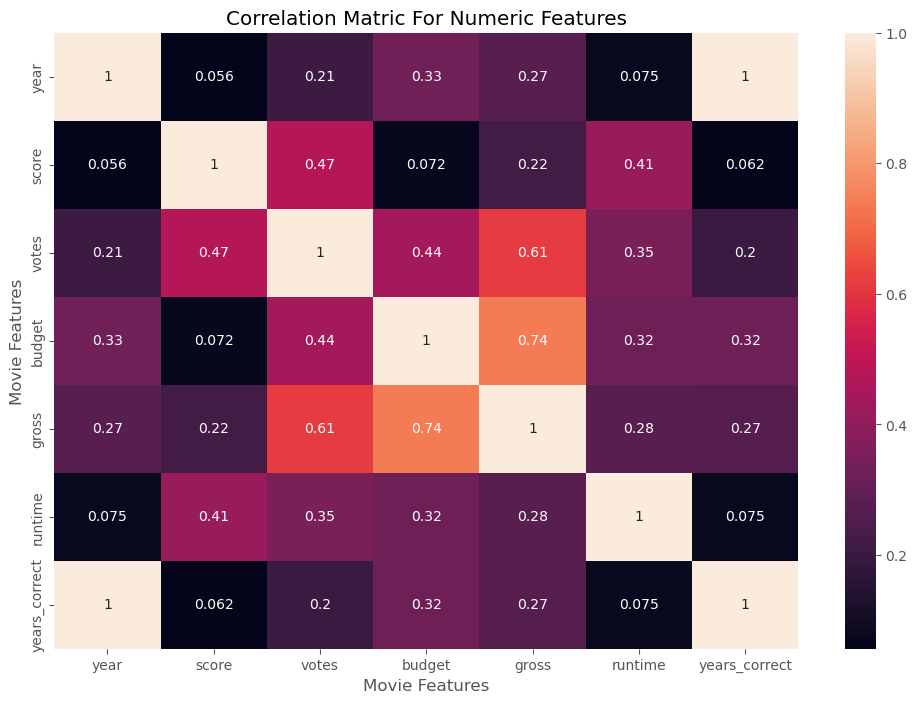

In [33]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True)    #high correlation between budget and gross 
                                               #high correlation between votes and gross 
plt.title('Correlation Matric For Numeric Features')
plt.xlabel('Movie Features') 
plt.ylabel('Movie Features')


In [34]:
#what about non-numeric columns, such as company or country?
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,years_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [41]:
df_numerize = df
for col in df_numerize.columns:
    if df_numerize[col].dtype == 'object' :
        df_numerize[col]= df_numerize[col].astype('category')
        df_numerize[col]= df_numerize[col].cat.codes


df_numerize.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,years_correct
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0,2009
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0,2019
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0,1997
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0,2015
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0,2018


In [48]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0


Text(120.72222222222221, 0.5, 'Movie Features')

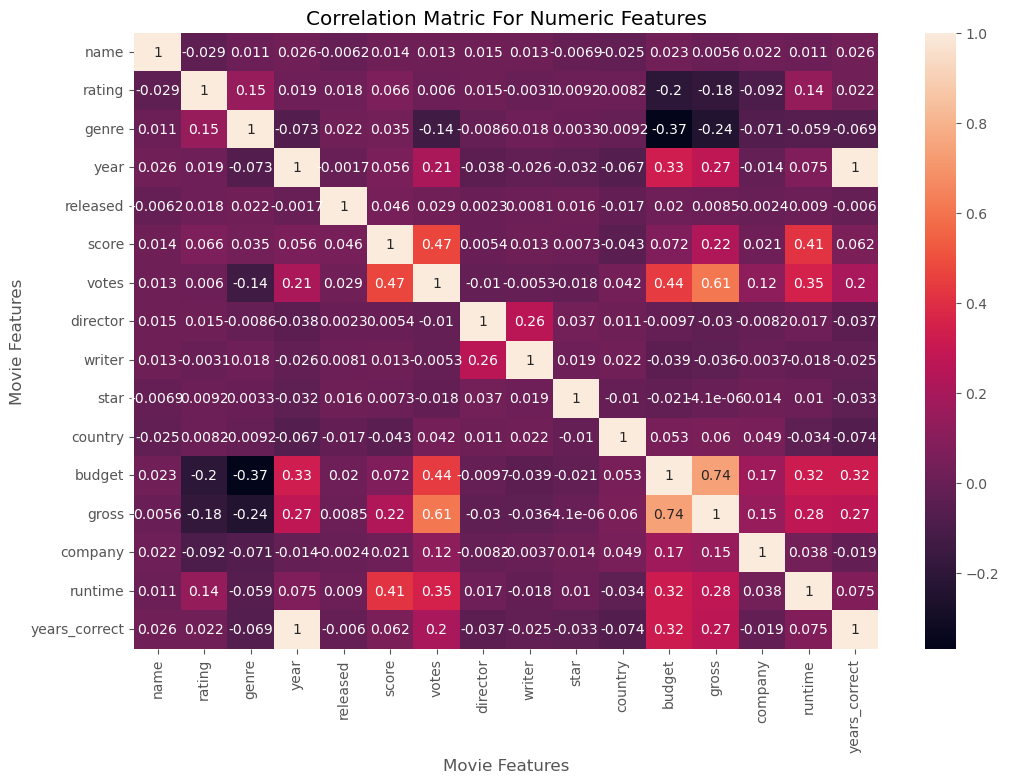

In [49]:
correlation_matrix2 = df_numerize.corr()

sns.heatmap(correlation_matrix2, annot=True)    #high correlation between budget and gross 
                                               #high correlation between votes and gross 
plt.title('Correlation Matric For Numeric Features')
plt.xlabel('Movie Features') 
plt.ylabel('Movie Features')

In [52]:
corr_pairs = correlation_matrix2.unstack()

corr_pairs

name           name             1.000000
               rating          -0.029234
               genre            0.010996
               year             0.025542
               released        -0.006152
               score            0.014450
               votes            0.012615
               director         0.015246
               writer           0.012880
               star            -0.006882
               country         -0.025490
               budget           0.023392
               gross            0.005639
               company          0.021697
               runtime          0.010850
               years_correct    0.025542
rating         name            -0.029234
               rating           1.000000
               genre            0.147796
               year             0.019499
               released         0.018083
               score            0.065983
               votes            0.006031
               director         0.014656
               w

In [53]:
sorted_corr_pairs = corr_pairs.sort_values()

sorted_corr_pairs

genre          budget          -0.368523
budget         genre           -0.368523
gross          genre           -0.244101
genre          gross           -0.244101
rating         budget          -0.203946
budget         rating          -0.203946
rating         gross           -0.181906
gross          rating          -0.181906
votes          genre           -0.135990
genre          votes           -0.135990
company        rating          -0.092357
rating         company         -0.092357
country        years_correct   -0.073569
years_correct  country         -0.073569
year           genre           -0.073167
genre          year            -0.073167
               company         -0.071334
company        genre           -0.071334
genre          years_correct   -0.069147
years_correct  genre           -0.069147
year           country         -0.066748
country        year            -0.066748
genre          runtime         -0.059237
runtime        genre           -0.059237
score          c

In [56]:
high_corr = sorted_corr_pairs[sorted_corr_pairs>0.5]
high_corr

gross          votes            0.614751
votes          gross            0.614751
gross          budget           0.740247
budget         gross            0.740247
year           years_correct    0.998726
years_correct  year             0.998726
name           name             1.000000
company        company          1.000000
gross          gross            1.000000
budget         budget           1.000000
country        country          1.000000
star           star             1.000000
writer         writer           1.000000
director       director         1.000000
votes          votes            1.000000
score          score            1.000000
released       released         1.000000
year           year             1.000000
genre          genre            1.000000
rating         rating           1.000000
runtime        runtime          1.000000
years_correct  years_correct    1.000000
dtype: float64

In [ ]:
#votes and budget turned out to have the highest correlation to gross!